# 4 Node Graph

In [1]:
import os
from copy import deepcopy
# set the directory to the root
os.chdir("/Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt")
from algorithms.CBO_algorithm import CBO
from algorithms.CEO_algorithm import CEO
import matplotlib.pyplot as plt
import seaborn as sns

from graphs.graph_4_nodes import Graph4Nodes
from graphs.data_setup import setup_observational_interventional

n_obs = 200
n_int = 2
n_anchor_points = 35
seeds_int_data = 42

all_graph_edges = [
    [("X", "T"), ("X", "Z"), ("T", "Y"), ("Z", "Y")],
    [("X", "T"), ("X", "Z"), ("T", "Y"), ("X", "Y"), ("Z", "Y")],  # adding one,
    [("X", "T"), ("X", "Z"), ("T", "Y")],  # removing one
    [("X", "T"), ("Z", "X"), ("T", "Y"), ("Z", "Y")],  # misspecifying one
]

# using this as the interventional and observational data
D_O, D_I, exploration_set = setup_observational_interventional(graph_type="Graph4", noiseless=True, seed=seeds_int_data)
exploration_set = [("T",)]

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
def plot_prior(graph_num: int):
    graph = Graph4Nodes()
    graph.mispecify_graph(all_graph_edges[graph_num])
    cbo_model = CBO(graph=graph)
    cbo_model.set_values(deepcopy(D_O), deepcopy(D_I), exploration_set)
    cbo_model.do_function_graph(
        es=('T',),
        size=100,
        save_path=f"model_checkpoints/Graph4CBO/graph_{graph_num}_T_prior",
        true_vals_style={'color': 'blue', 'linestyle': '--'},
        predictions_style={'color': 'red', 'linewidth': 2},
        fill_color='green',
        fill_alpha=0.3,
        xlabel='T',
        ylabel='E[Y|do(T)]',
        # title='Prior GP for do(T) interventional distribution for True Graph',
    )

    # cbo_model.do_function_graph(
    #     es=('X',),
    #     size=100,
    #     save_path=f"model_checkpoints/Graph4CBO/graph_{graph_num}_X_prior",
    #     true_vals_style={'color': 'blue', 'linestyle': '--'},
    #     predictions_style={'color': 'red', 'linewidth': 2},
    #     fill_color='green',
    #     fill_alpha=0.3,
    #     xlabel='X',
    #     ylabel='Custom Y Label',
    #     title='Prior GP for do(X) interventional distribution for True Graph',
    # )

    # cbo_model.do_function_graph(
    #     es=('Z',),
    #     size=100,
    #     save_path=f"model_checkpoints/Graph4CBO/graph_{graph_num}_Z_prior",
    #     true_vals_style={'color': 'blue', 'linestyle': '--'},
    #     predictions_style={'color': 'red', 'linewidth': 2},
    #     fill_color='green',
    #     fill_alpha=0.3,
    #     xlabel='Z',
    #     ylabel='Custom Y Label',
    #     title='Prior GP for do(Z) interventional distribution for True Graph',
    # )

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting marginal distribution for child X
INFO:root:Fitting child: Y to parents: ['T', 'Z'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound


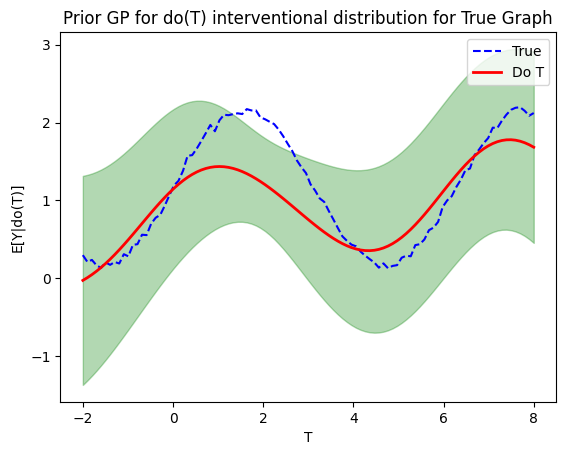

In [3]:
plot_prior(0)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting marginal distribution for child X
INFO:root:Fitting child: Y to parents: ['T', 'X', 'Z'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound


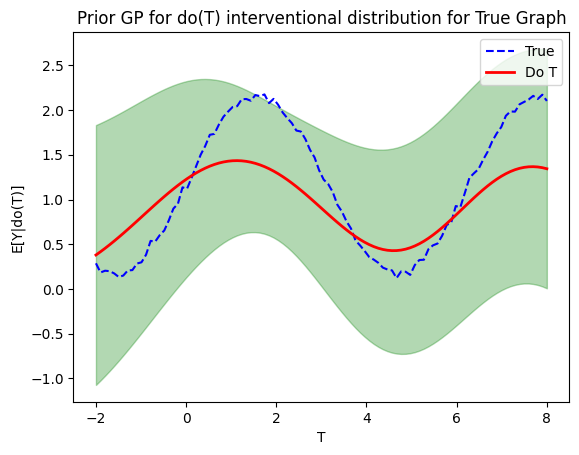

In [4]:
plot_prior(1)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting marginal distribution for child X
INFO:root:Fitting child: Y to parents: ['T'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound


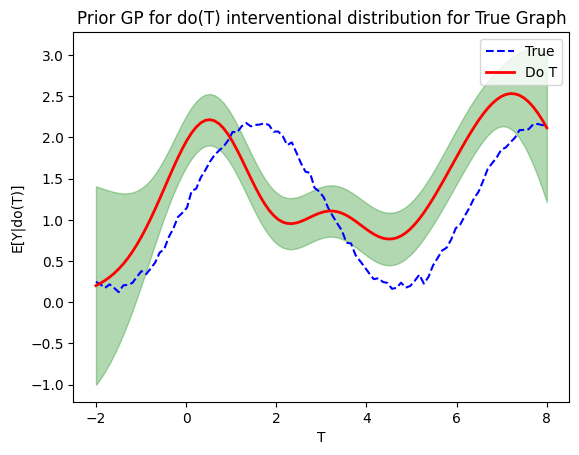

In [5]:
plot_prior(2)

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: X to parents: ['Z'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: Y to parents: ['T', 'Z'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting marginal distribution for child Z
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound


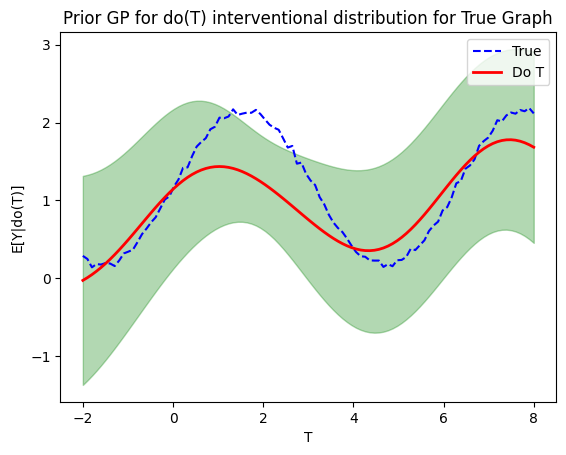

In [6]:
plot_prior(3)

In [7]:
graph_num = 0
graph = Graph4Nodes()
graph.mispecify_graph(all_graph_edges[graph_num])
cbo_model = CBO(graph=graph)
cbo_model.set_values(deepcopy(D_O), deepcopy(D_I), exploration_set)
(global_opt,
current_y,
current_cost,
intervention_set,
intervention_values) = cbo_model.run_algorithm(T = 15, file=f"model_checkpoints/Graph4CBO/graph_{graph_num}")

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting marginal distribution for child X
INFO:root:Fitting child: Y to parents: ['T', 'Z'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Fitting marginal distribution for child X
INFO:root:Fitting child: Y to parents: ['T', 'Z'] for [('X

KeyboardInterrupt: 

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: Y to parents: ['Z'] for [('X', 'T'), ('X', 'Z'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Y to parents: ['Z'] for [('X', 'T'), ('X', 'Z'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('X', 'Z'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference met

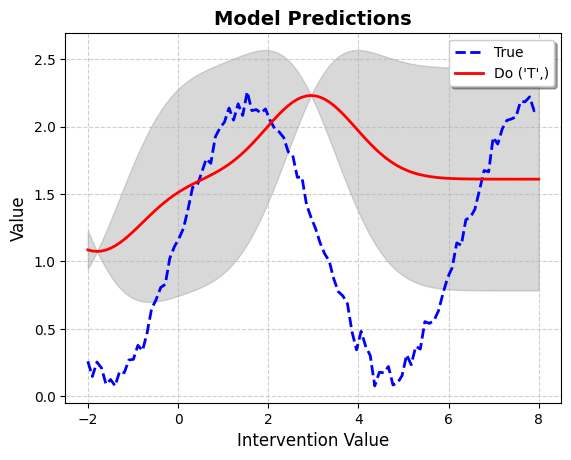

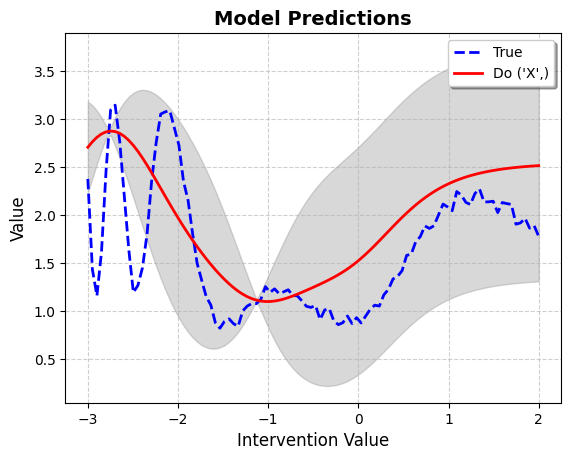

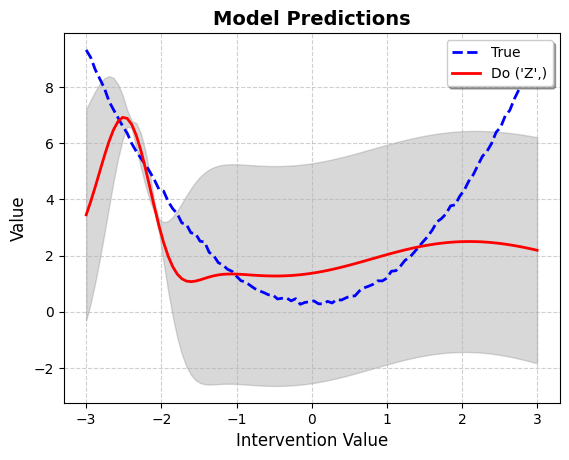

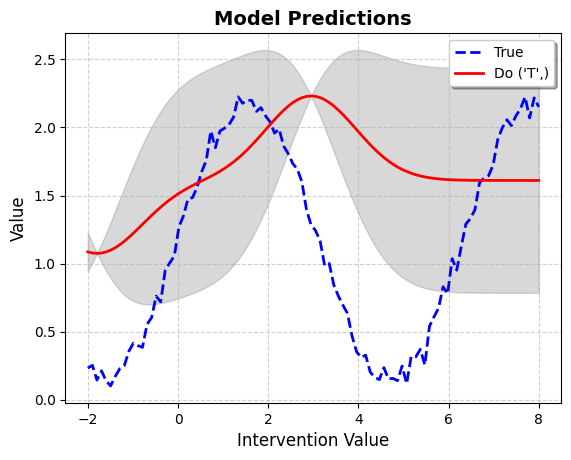

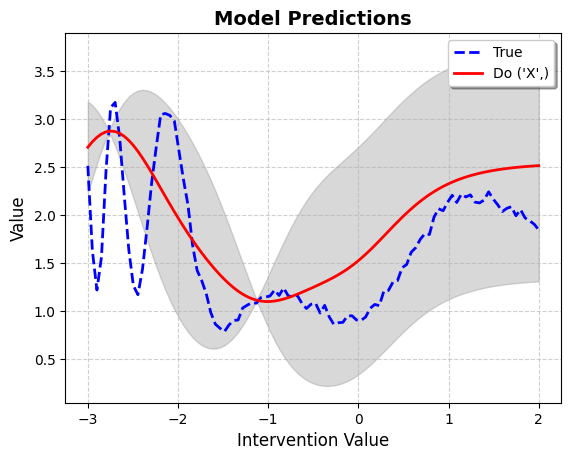

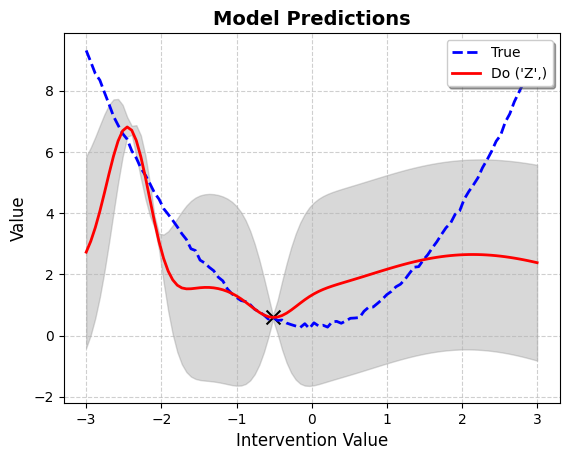

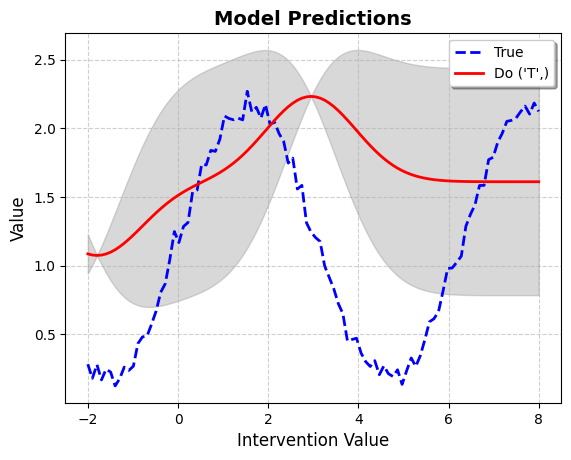

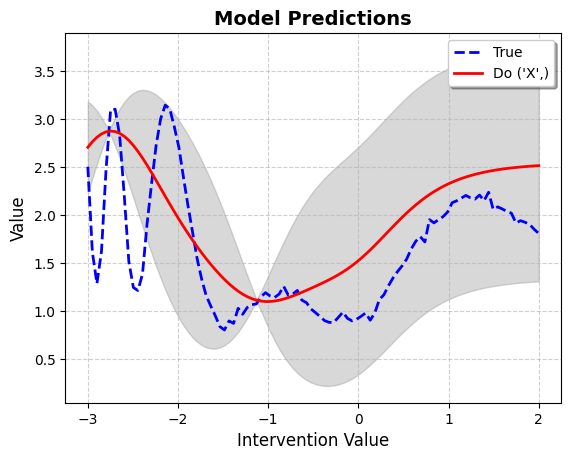

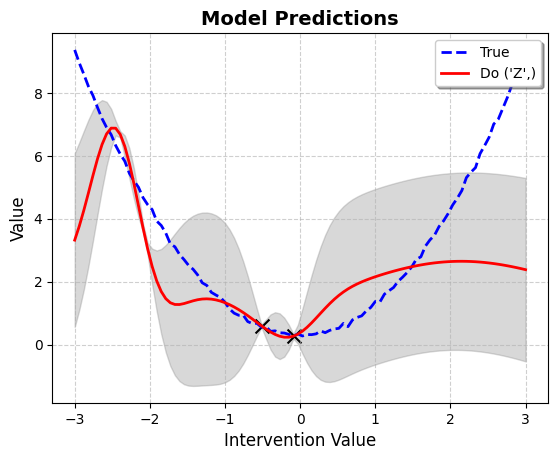

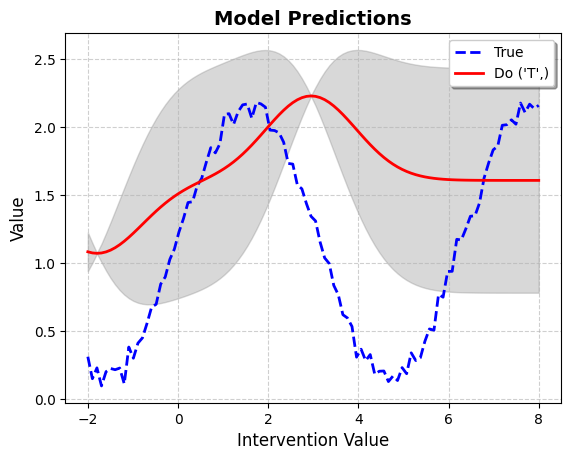

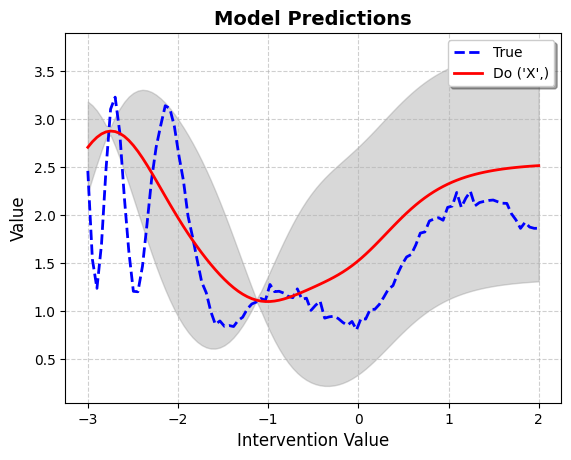

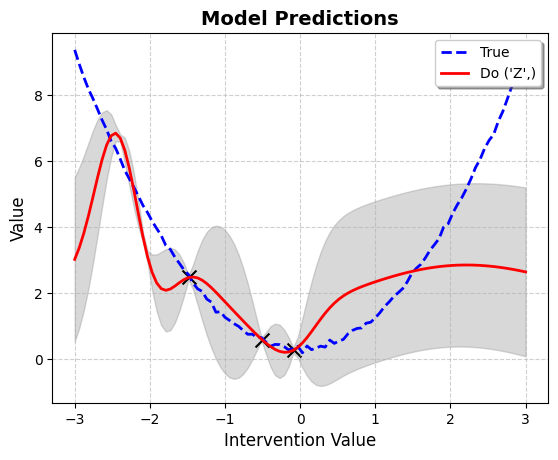

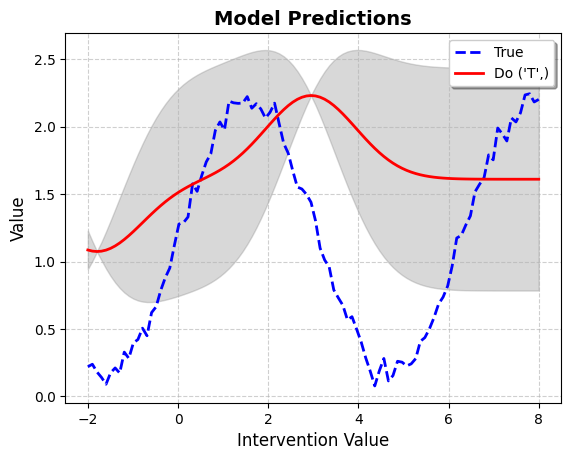

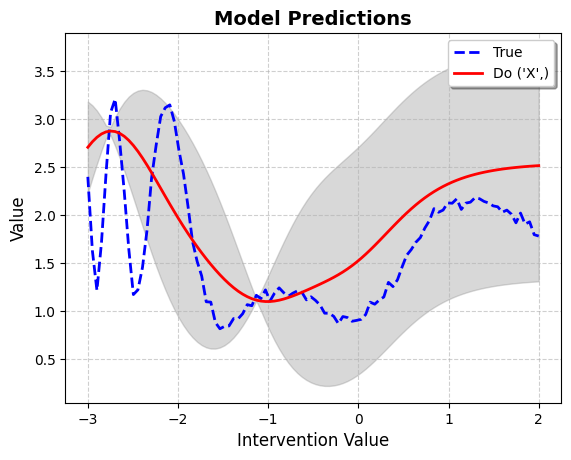

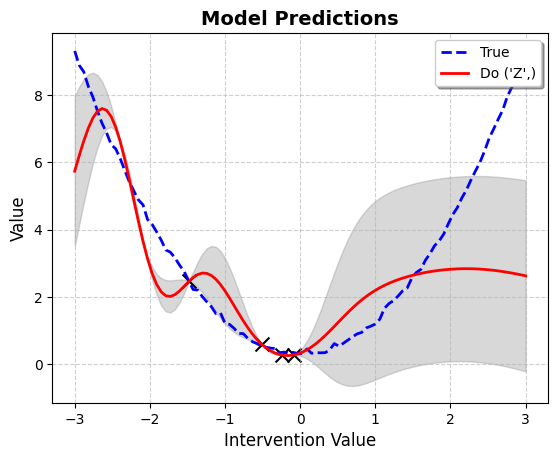

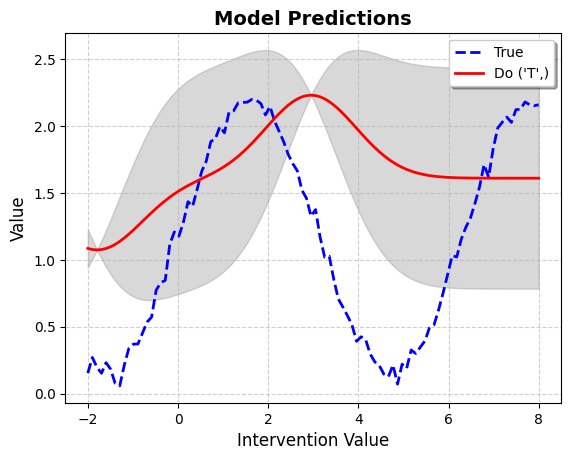

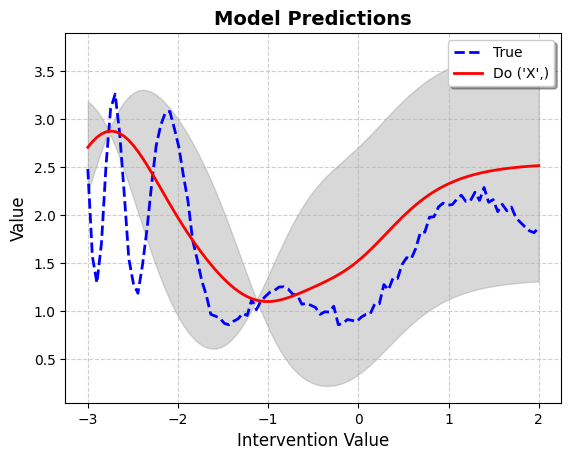

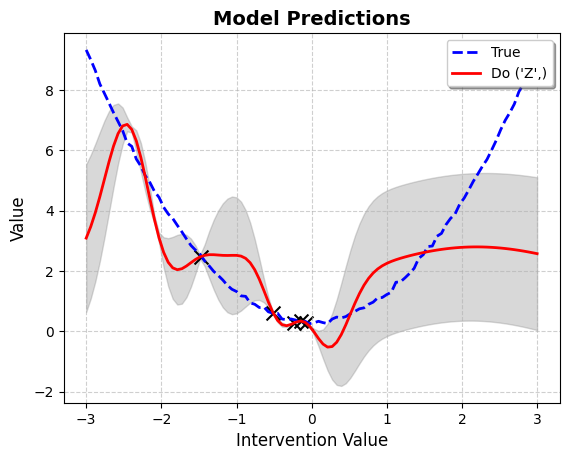

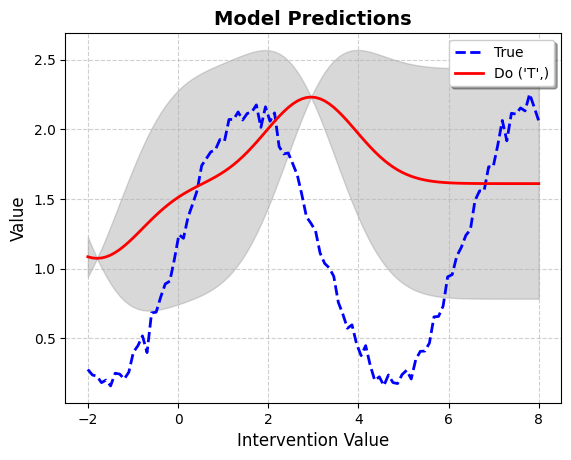

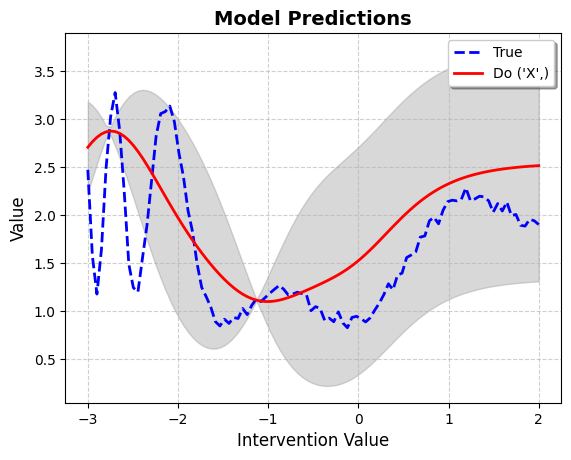

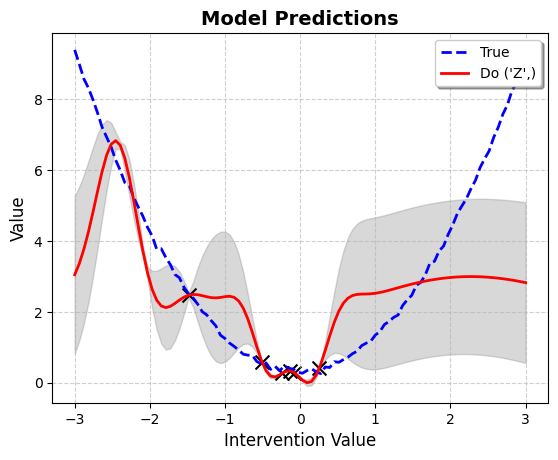

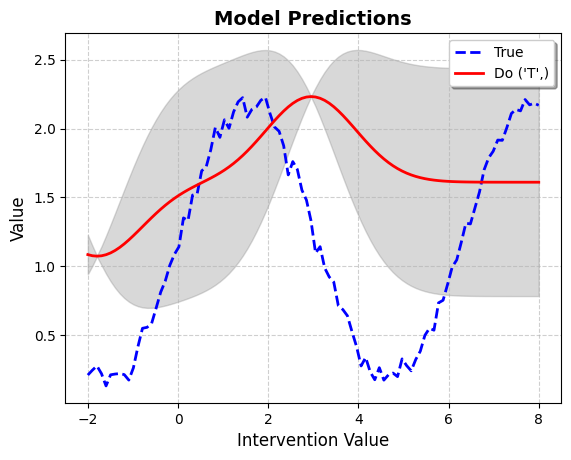

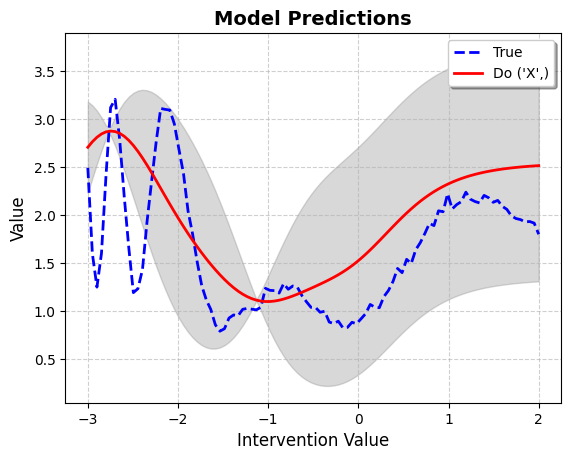

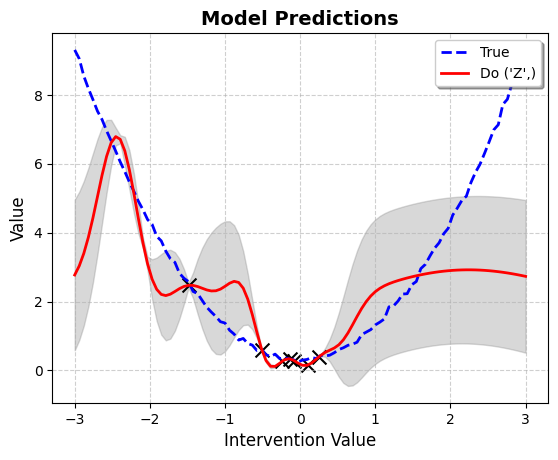

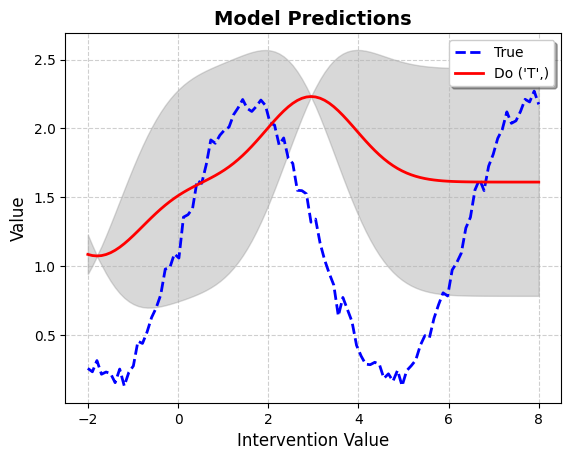

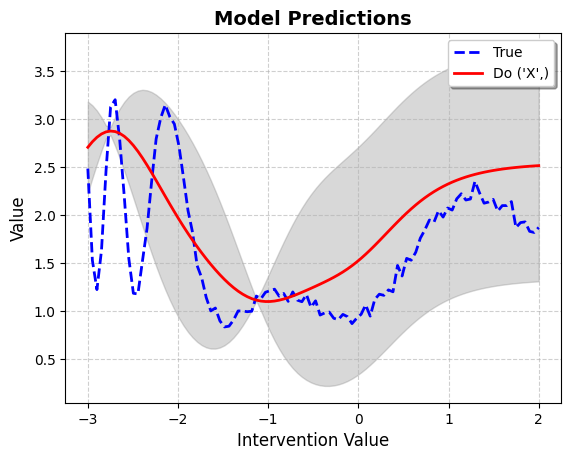

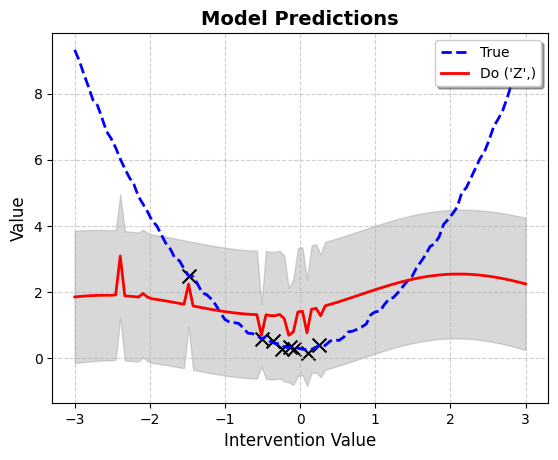

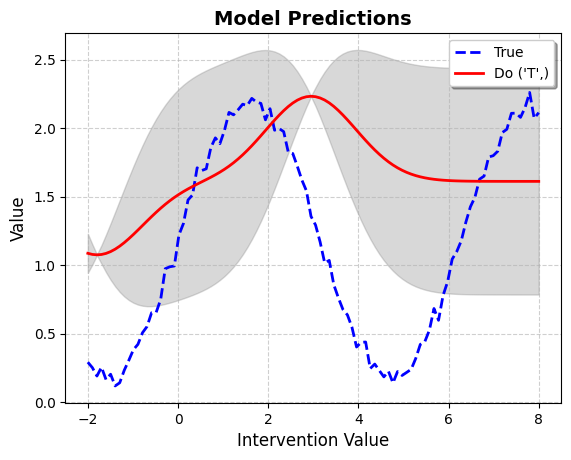

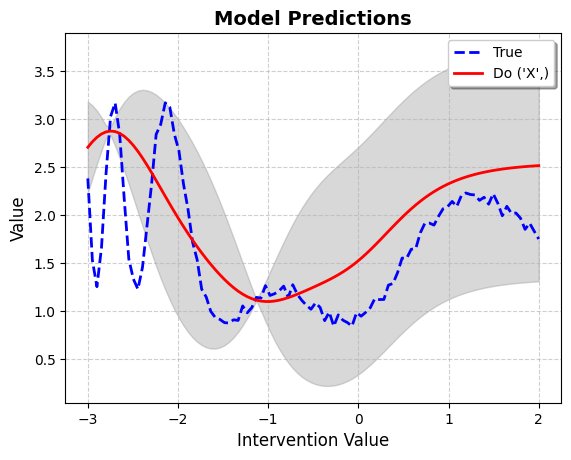

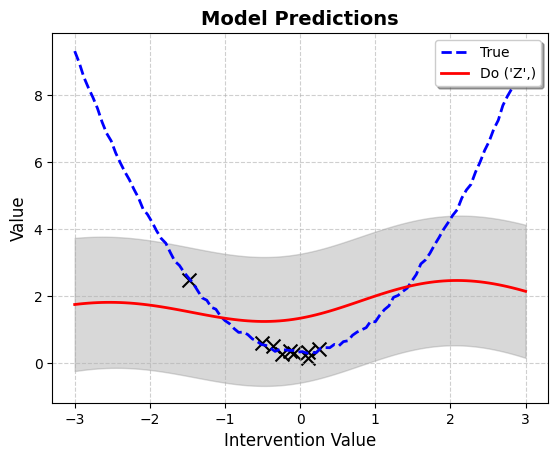

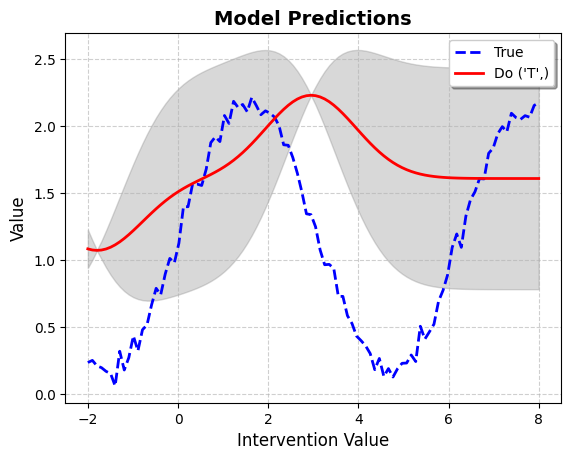

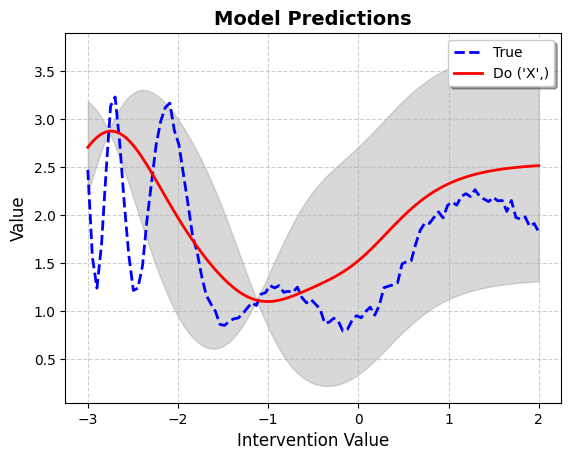

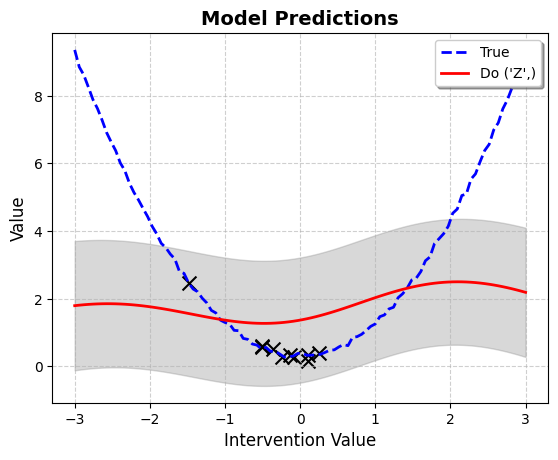

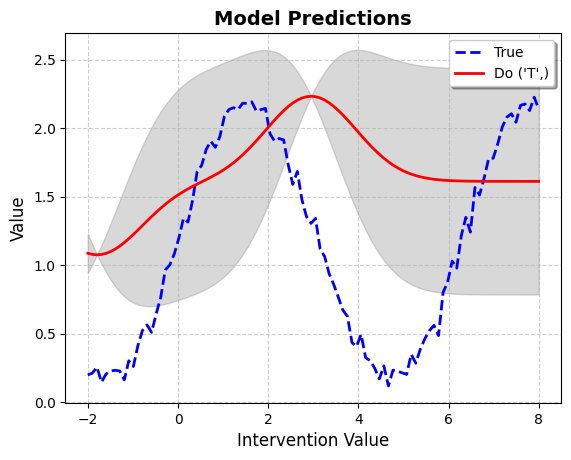

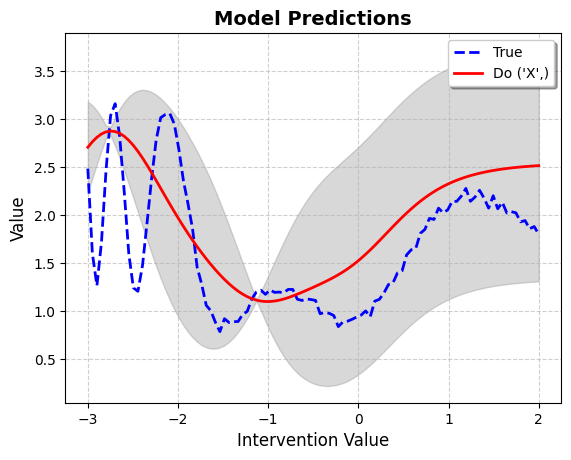

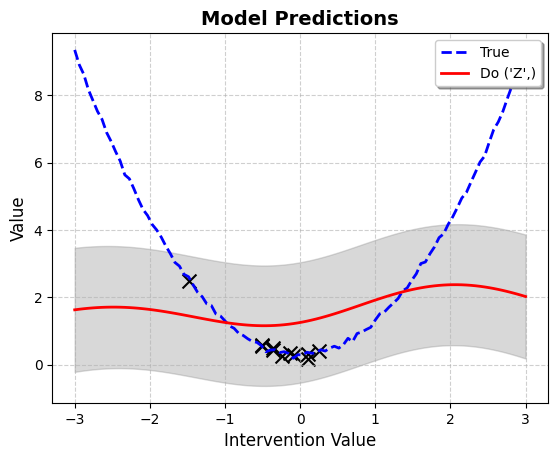

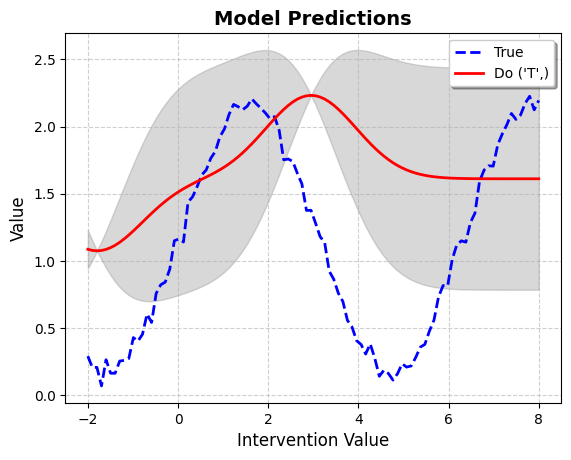

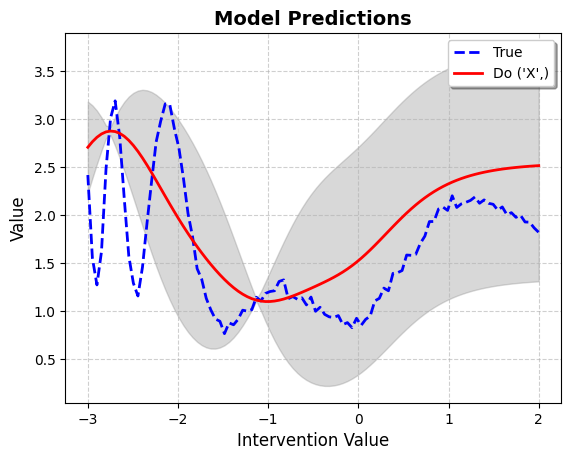

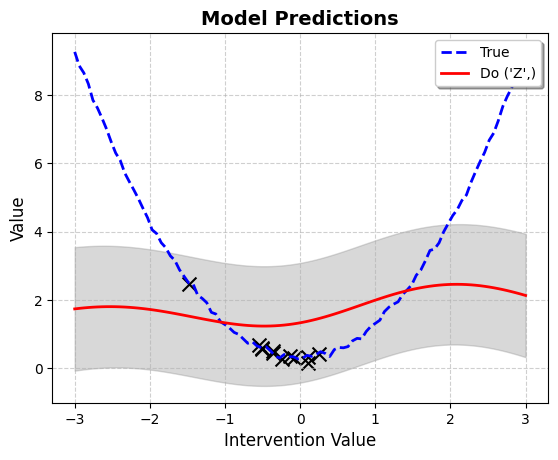

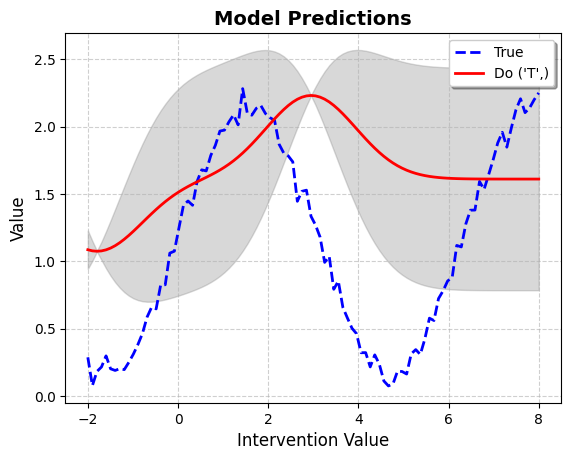

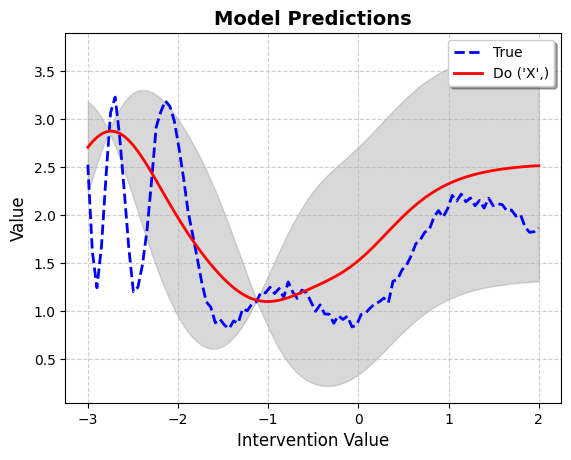

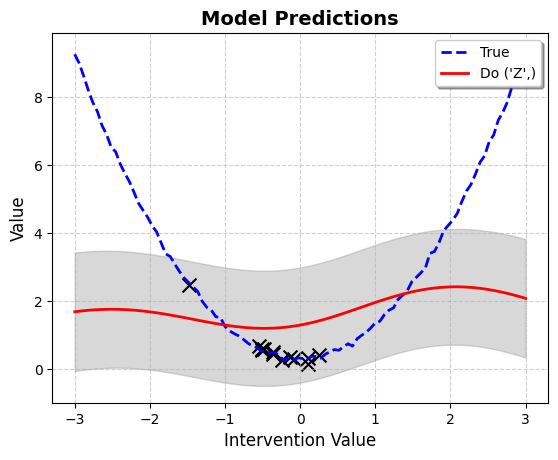

In [ ]:
graph_num = 2
graph = Graph4Nodes()
graph.mispecify_graph(all_graph_edges[graph_num])
cbo_model = CBO(graph=graph)
cbo_model.set_values(deepcopy(D_O), deepcopy(D_I), exploration_set)
(global_opt,
current_y,
current_cost,
intervention_set,
intervention_values) = cbo_model.run_algorithm(T = 15, file=f"model_checkpoints/Graph4CBO/graph_{graph_num}")

INFO:root:Using predefined values for the optimization algorithm
INFO:root:Fitting child: Y to parents: ['T', 'Z'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: X to parents: ['Z'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: T to parents: ['X'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Y to parents: ['T', 'Z'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: X to parents: ['Z'] for [('X', 'T'), ('Z', 'X'), ('T', 'Y'),

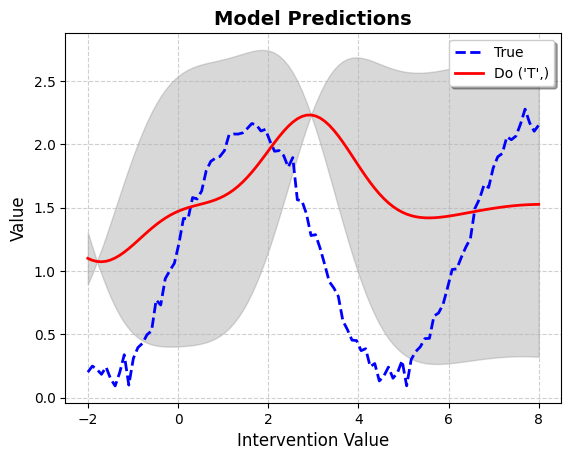

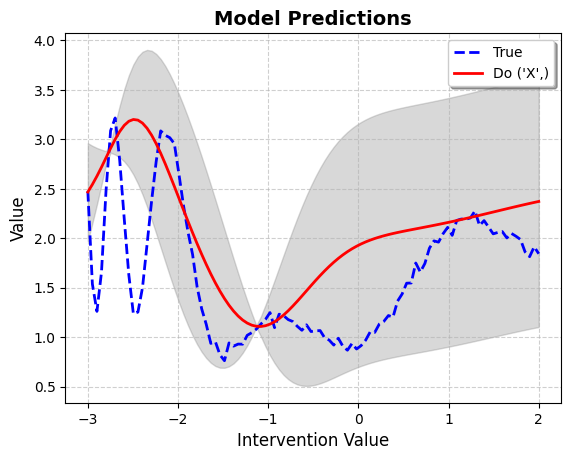

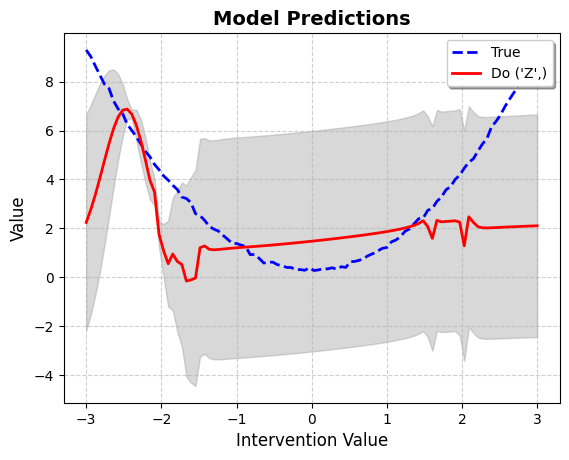

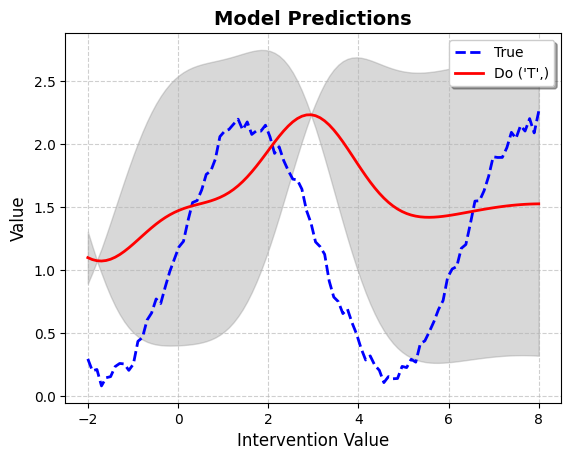

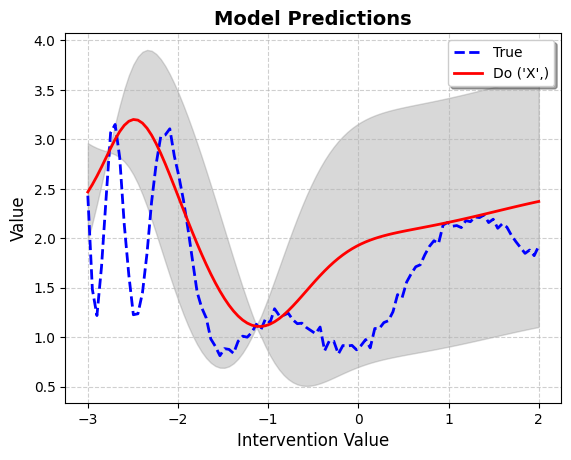

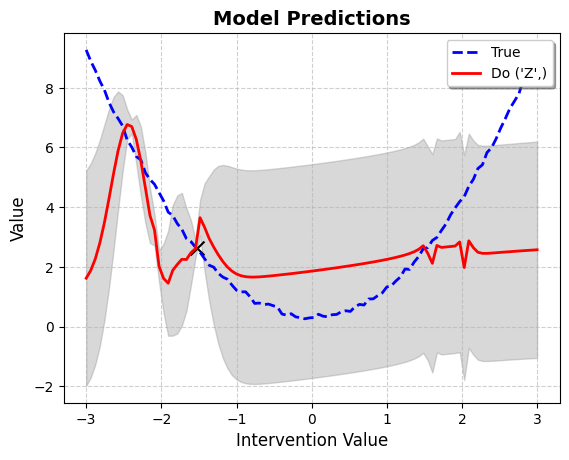

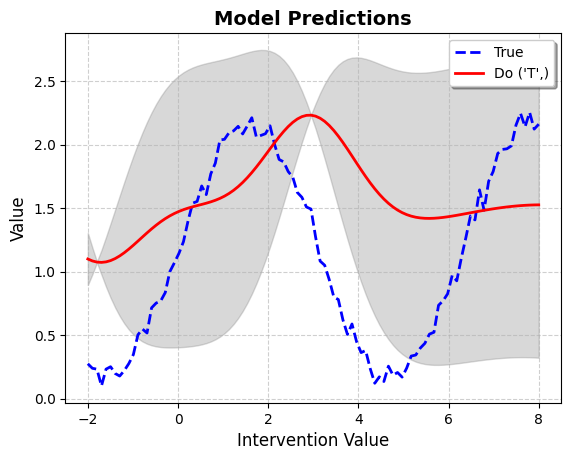

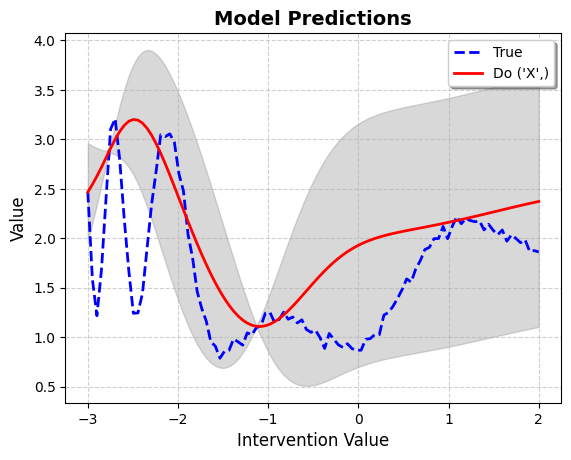

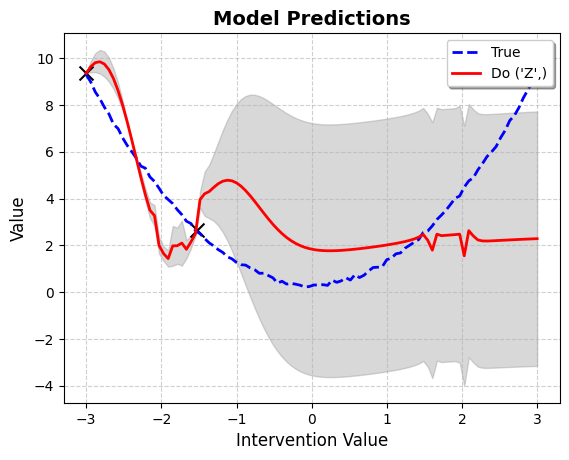

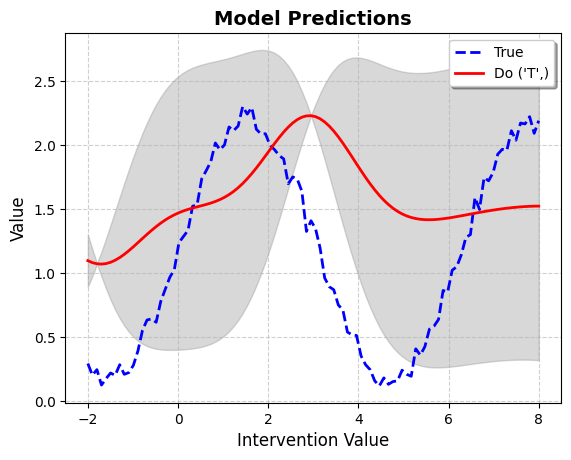

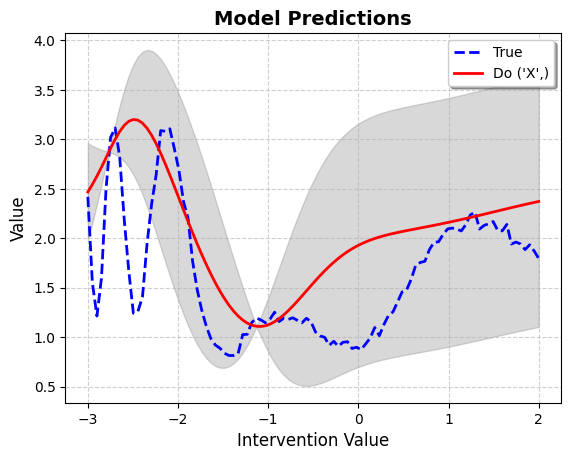

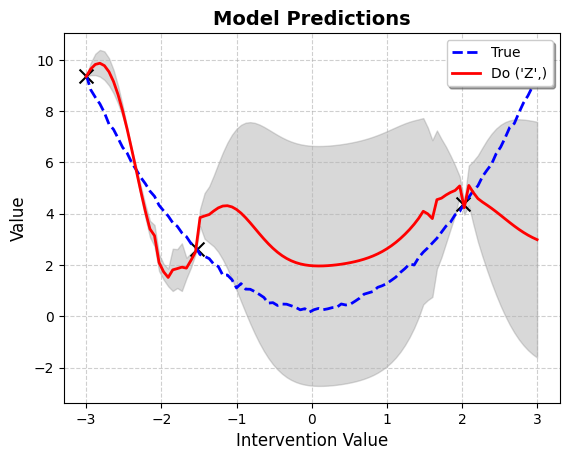

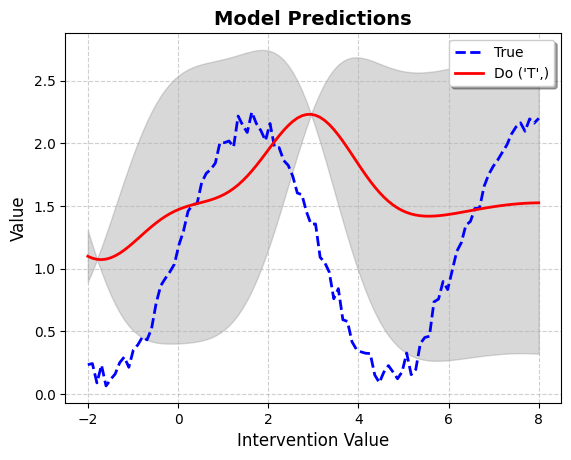

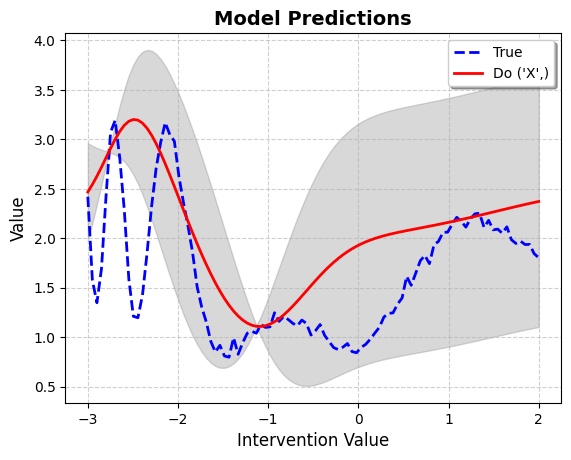

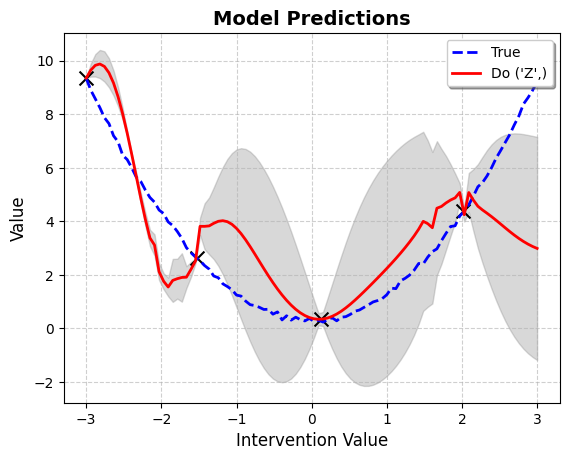

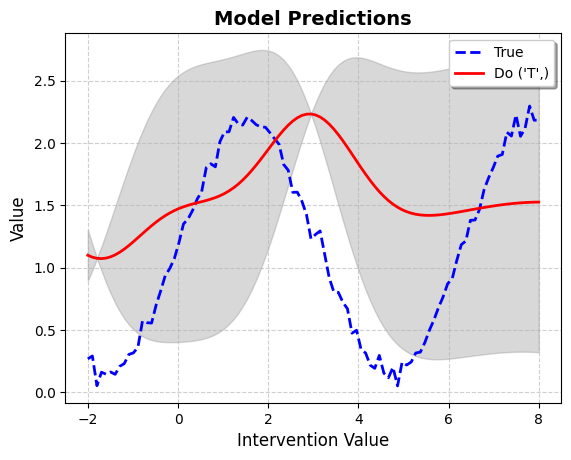

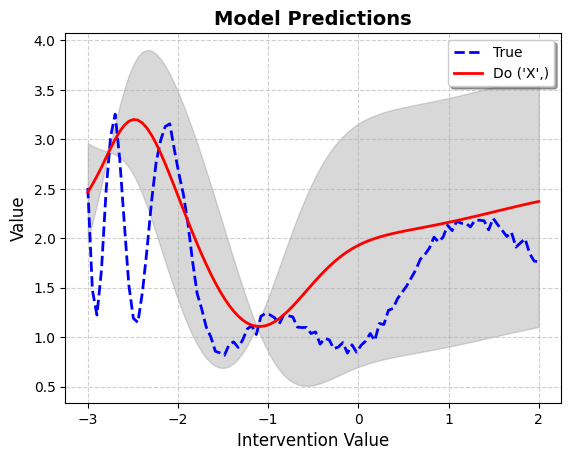

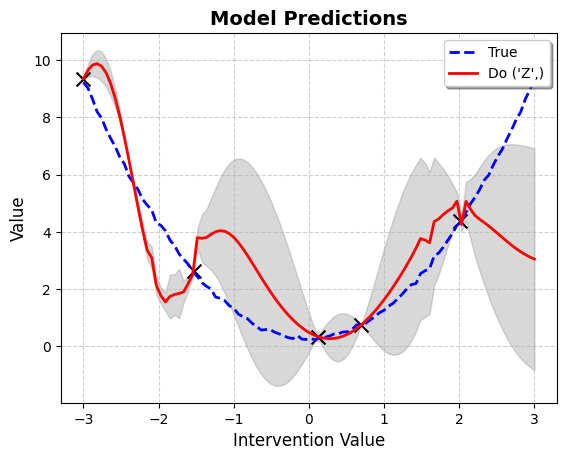

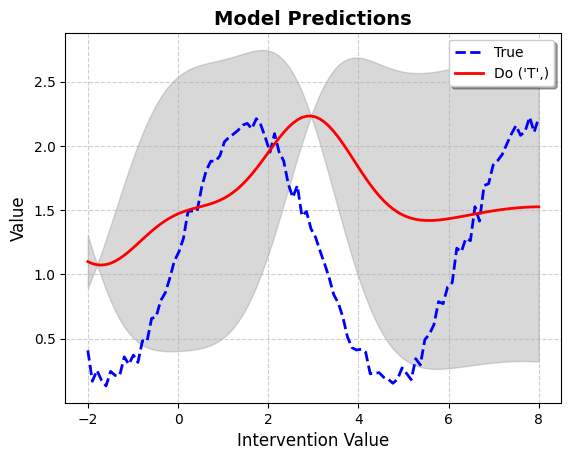

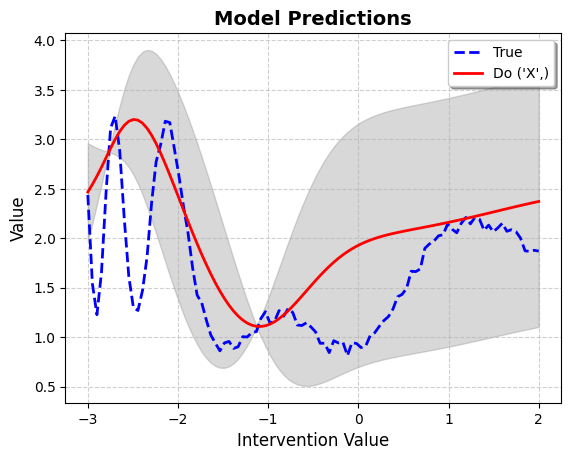

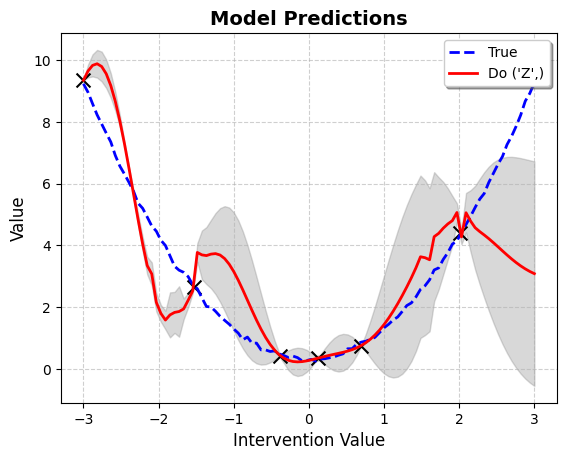

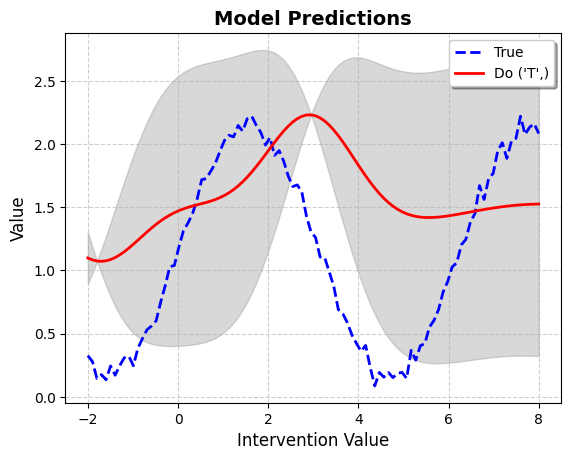

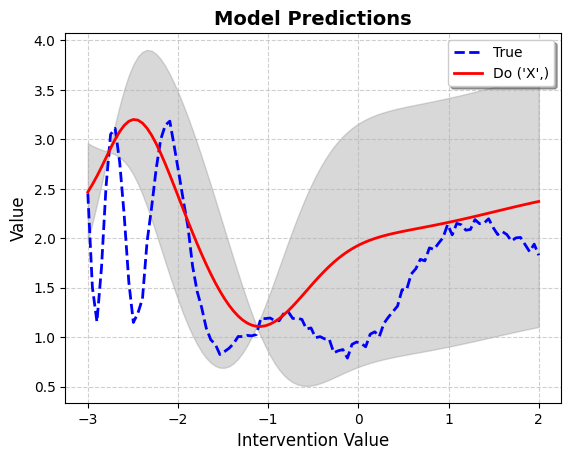

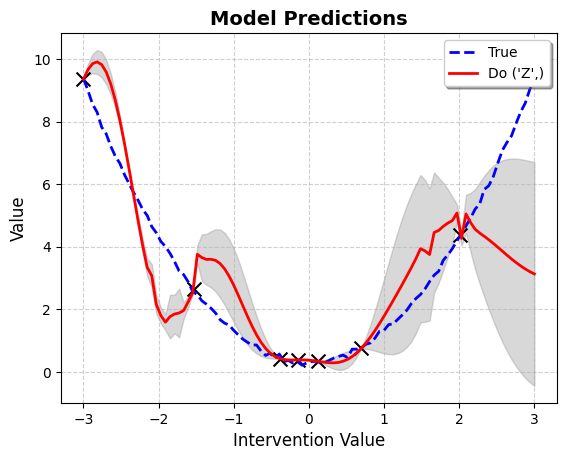

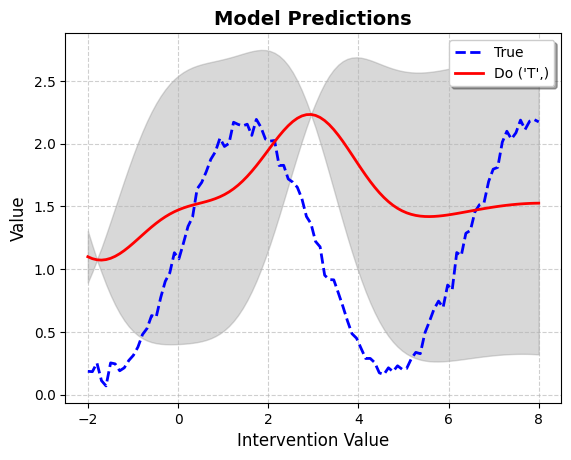

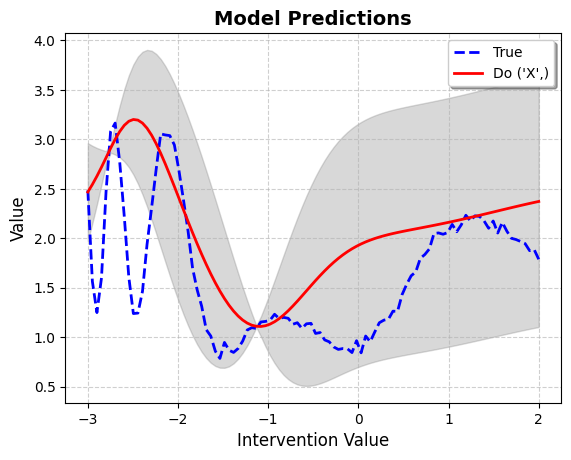

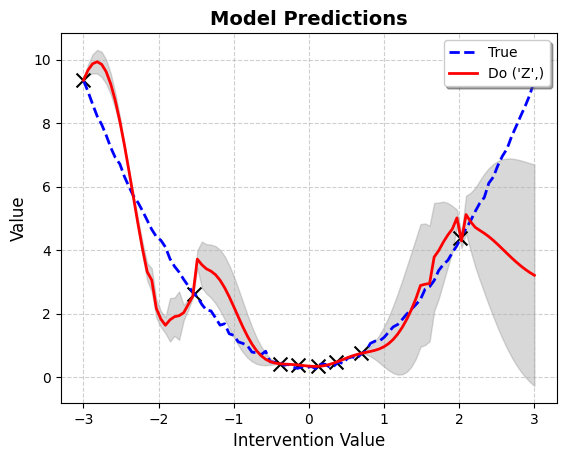

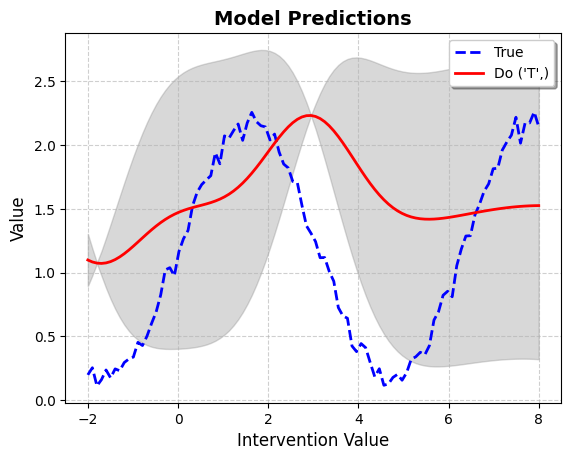

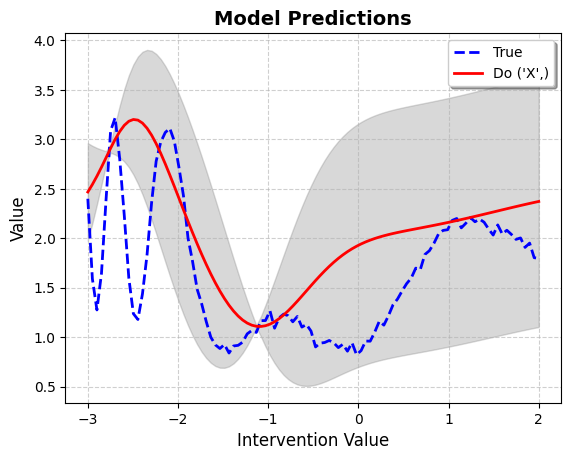

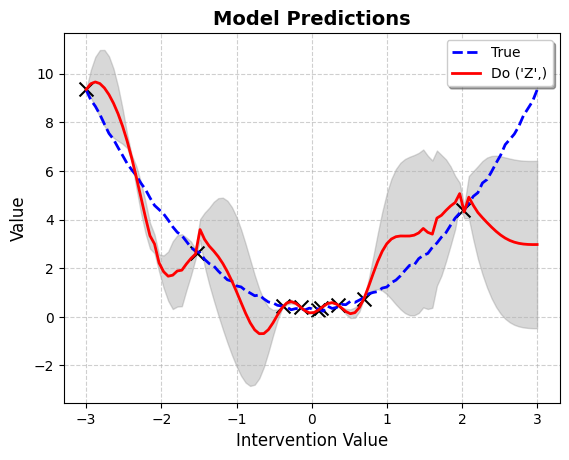

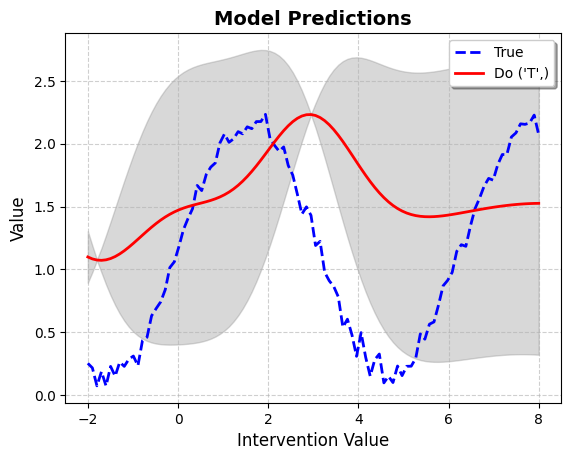

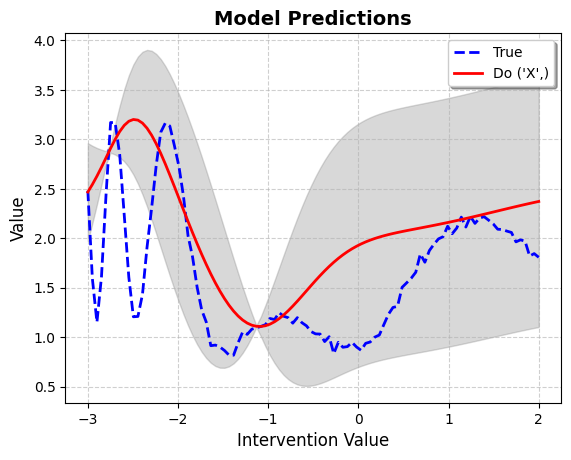

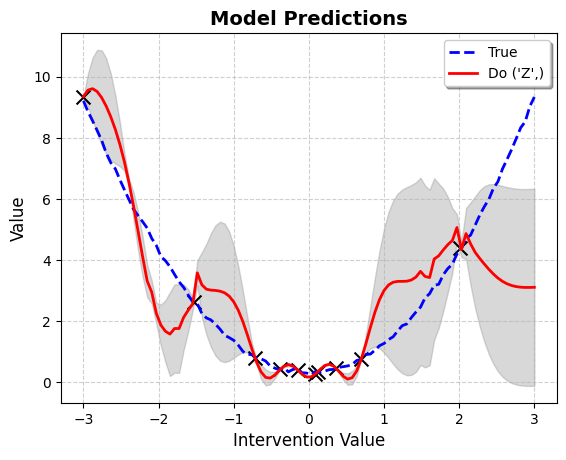

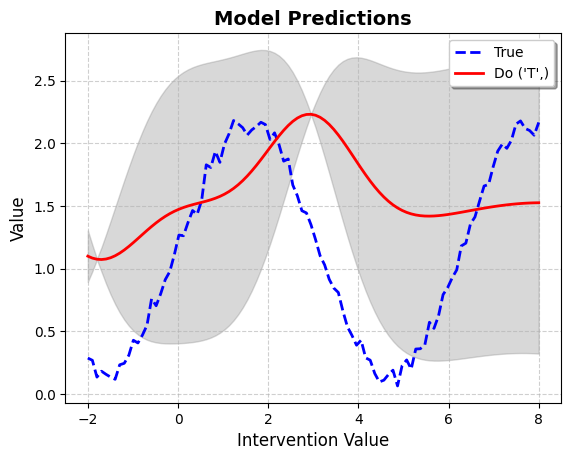

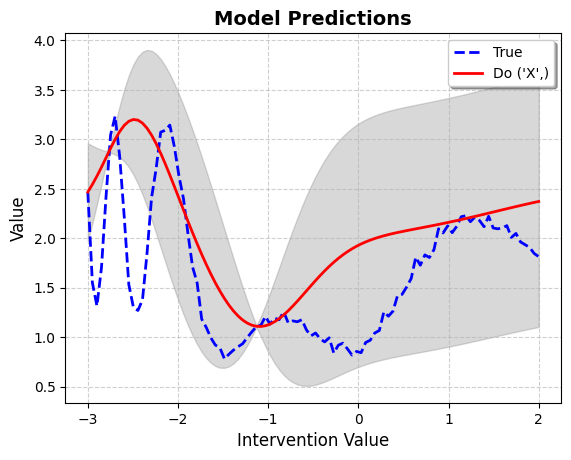

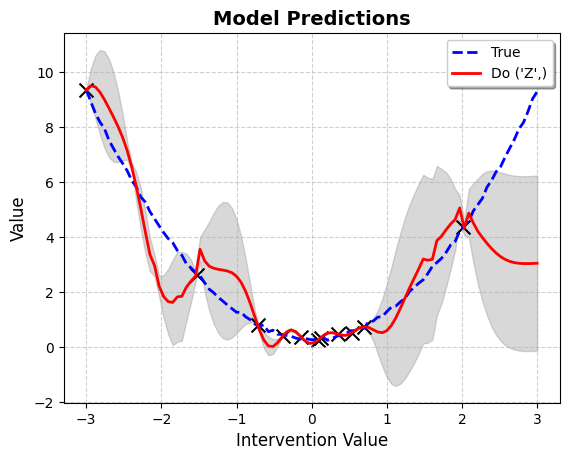

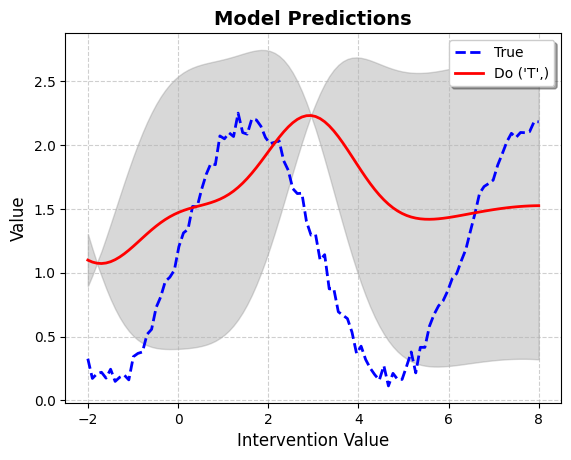

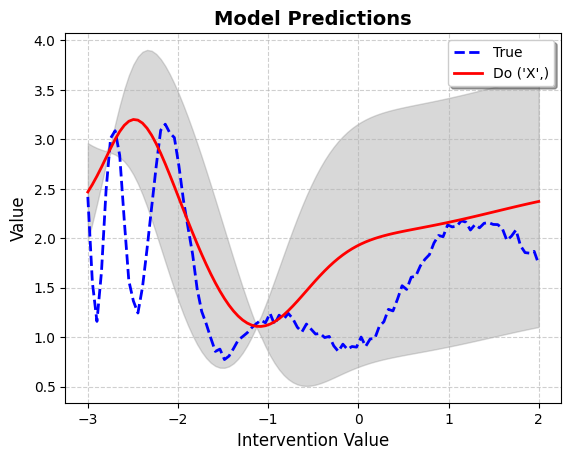

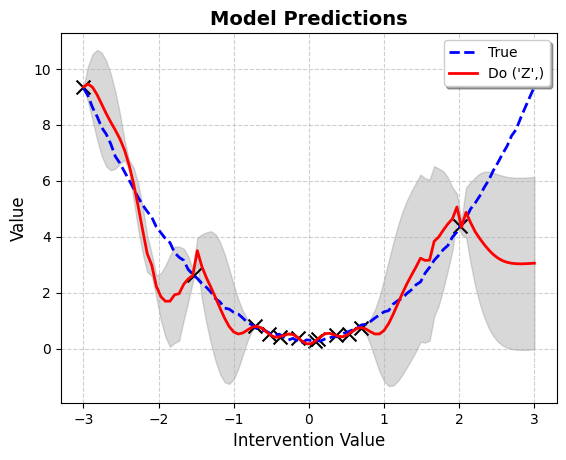

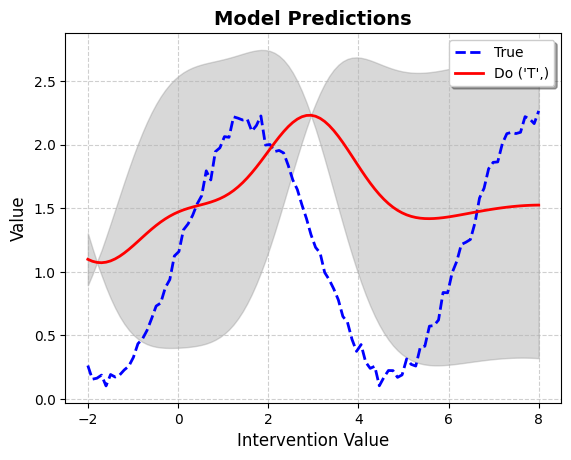

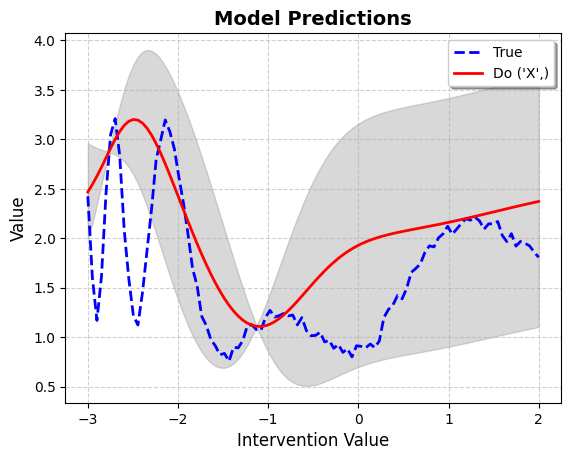

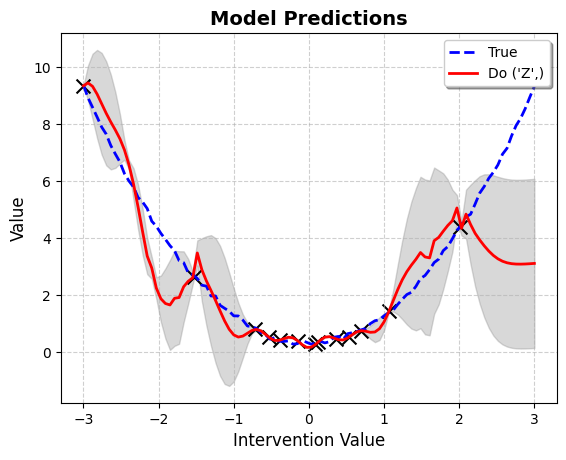

In [ ]:
graph_num = 3
graph = Graph4Nodes()
graph.mispecify_graph(all_graph_edges[graph_num])
cbo_model = CBO(graph=graph)
cbo_model.set_values(deepcopy(D_O), deepcopy(D_I), exploration_set)
(global_opt,
current_y,
current_cost,
intervention_set,
intervention_values) = cbo_model.run_algorithm(T = 15, file=f"model_checkpoints/Graph4CBO/graph_{graph_num}")